In [14]:
from fluid_experiment.fluid_experiment import FluidExperiment

path_experiment = "/Users/lukasv/DATA/midap/FluidPhage_REP1_results"
color_channels = ["CFP","YFP"]
name = "FluidPhage"

exp = FluidExperiment(path_experiment,color_channels, name=name)


exp.load_metadata_template()

exp.filter_data("trackID",min_occurences=5)

exp.calculate_transform_data("major_axis_length")

exp.calculate_growth_rate(5,"trackID","major_axis_length_log")

all_dat = []
for p in exp.positions:
    dat = exp[p]["CFP"].copy()
    dat["position"] = p
    dat["group"] = exp.metadata.loc[p, "group"]
    all_dat.append(dat)
    
from mutate.fuse import fuse_track_output

fused = fuse_track_output(all_dat)


Loading sample at position pos1 for group CFP
Loading sample at position pos1 for group YFP
Loading sample at position pos2 for group CFP
Loading sample at position pos2 for group YFP
Loading sample at position pos3 for group CFP
Loading sample at position pos3 for group YFP
Loading sample at position pos4 for group CFP
Loading sample at position pos4 for group YFP
Loading sample at position pos5 for group CFP
Loading sample at position pos5 for group YFP
Loading sample at position pos6 for group CFP
Loading sample at position pos6 for group YFP
Loading sample at position pos7 for group CFP
Loading sample at position pos7 for group YFP
Loading sample at position pos8 for group CFP
Loading sample at position pos8 for group YFP
Loading sample at position pos9 for group CFP
Loading sample at position pos9 for group YFP
Loading sample at position pos10 for group CFP
Loading sample at position pos10 for group YFP
Loading sample at position pos11 for group CFP
Loading sample at position pos1

/var/folders/j6/g1dhc7bd43nbkk9xggr6y9m40000gn/T/ipykernel_46182/2700851908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/j6/g1dhc7bd43nbkk9xggr6y9m40000gn/T/ipykernel_46182/2700851908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/midap-tools/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     growth_rate 
No. Observations:       879606      Method:                 REML        
No. Groups:             6888        Scale:                  0.0002      
Min. group size:        1           Log-Likelihood:         2393973.2373
Max. group size:        2755        Converged:              Yes         
Mean group size:        127.7                                           
------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    0.013    0.000   26.601 0.000  0.012  0.014
bin[T.bin2]                 -0.012    0.000 -109.271 0.000 -0.012 -0.012
group[T.Group2]              0.010    0.001   12.715 0.000  0.008  0.011
group[T.Group3]              0.001    0.001    0.821 0.411 -0.001  0.

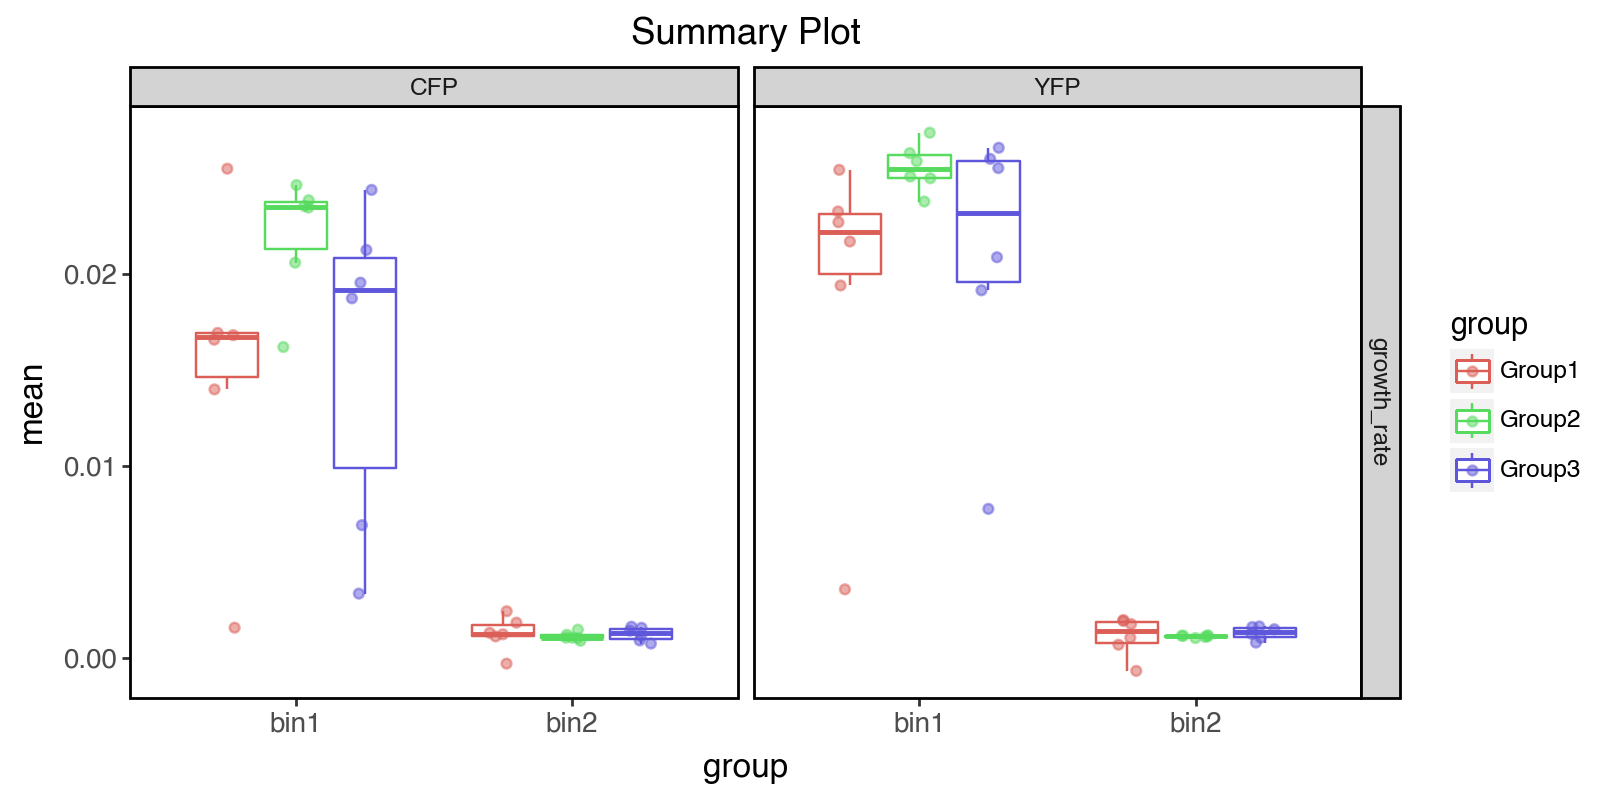

In [24]:
test1 = all_dat[0]
test2 = all_dat[5]

import statsmodels.formula.api as smf
import numpy as np


df_clean = fused.dropna(subset=["growth_rate"])

df_clean["bin"] = np.where(df_clean["frame"] < 20, "bin1", "bin2")
df_clean["bin"] = df_clean["bin"].astype("category")

model = smf.mixedlm("growth_rate ~ bin * group", df_clean, groups=df_clean["lineageID"], re_formula="~1")
result = model.fit()
print(result.summary())

exp.add_bin_data({"bin1":range(0,20),"bin2":range(20,150)})
exp.plot_data_summary("growth_rate",group_by="group",use_bins=True)